<a href="https://colab.research.google.com/github/Vahe0795/Machine-Learning/blob/main/Loan_status_prediction_with_different_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('loan_.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [2]:
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df = df.drop(["Loan_ID"], axis=1)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df.loc[:,'Gender'] = le.fit_transform(df.Gender)
df.loc[:,'Married'] = le.fit_transform(df.Married)
df.loc[:,'Dependents'] = le.fit_transform(df.Dependents)
df.loc[:,'Education'] = le.fit_transform(df.Education)
df.loc[:,'Self_Employed'] = le.fit_transform(df.Self_Employed)
df.loc[:,'Property_Area'] = le.fit_transform(df.Property_Area)
df.loc[:,'Loan_Status'] = le.fit_transform(df.Loan_Status)

In [7]:
df = df.fillna(0)

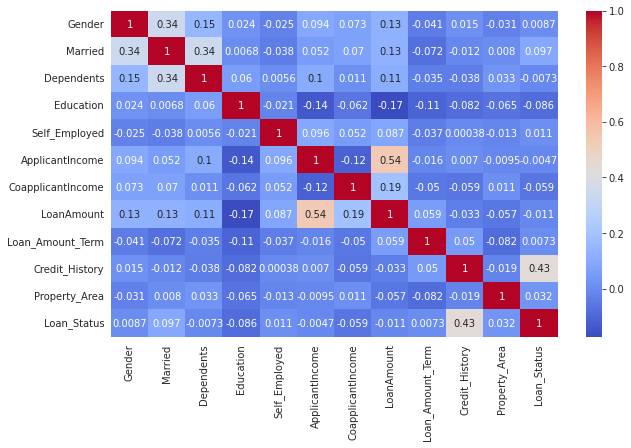

In [8]:
#correlation matrix 
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("dark")
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

In [9]:
X = df[df.columns.difference(["Loan_Status"])]
Y = df["Loan_Status"]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [12]:
from sklearn.linear_model import LogisticRegression
Logreg = LogisticRegression()
Logreg.fit(X_train, Y_train)
Logpred = Logreg.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score
acc_l = accuracy_score(Y_test , Logpred)*100
acc_l

76.62337662337663

In [14]:
from sklearn.ensemble  import RandomForestClassifier, GradientBoostingClassifier
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)
pred_rf = random_forest.predict(X_test)
acc_rf = accuracy_score(Y_test , pred_rf)*100
acc_rf

74.02597402597402

In [15]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
pred_gb = gaussian.predict(X_test)
acc_gb = accuracy_score(Y_test , pred_gb)*100
acc_gb

74.67532467532467

In [16]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)
pred_svm = svc.predict(X_test)
acc_svm = accuracy_score(Y_test , pred_svm)*100
acc_svm

64.93506493506493

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(Y_test , pred_knn)*100
acc_knn

60.3896103896104

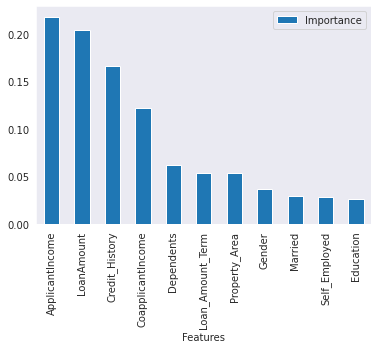

In [18]:
importances = pd.DataFrame({'Features':X_train.columns,'Importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False).set_index('Features')
importances.head(11)
importances.plot.bar()
